In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas
import xarray
import h5py
import random

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

In [2]:
os.getenv('ENDPOINT_URL') 
tbl_file = 's3://llc/Tables/test_noise_modis2012.parquet'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: s3://llc/Tables/test_noise_modis2012.parquet


In [3]:
llc_table.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,field_size,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL
0,-52.410507,-42.126858,1028,2012-01-01 04:10:00,-147.370605,64,0.049805,4.124990,3.401999,6.411,...,64,0,487936,-52.406319,-42.135418,4687,17049,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,124.020691
1,-52.194720,-42.787216,997,2012-01-01 04:10:00,-248.946106,48,0.043213,5.315350,3.464000,6.544,...,64,0,517068,-52.188812,-42.781250,4705,17018,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,45.473206
2,-52.031720,-43.191420,976,2012-01-01 04:10:00,-264.156342,33,0.049500,5.912542,3.557000,6.852,...,64,0,58066,-52.031147,-43.197918,4718,16998,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,159.249695
3,-51.908875,-42.702328,997,2012-01-01 04:10:00,-228.816925,16,0.018188,5.859069,3.442000,6.709,...,64,0,76355,-51.909538,-42.697918,4728,17022,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,153.434143
4,-51.865665,-43.186947,974,2012-01-01 04:10:00,-260.829315,16,0.048279,6.131550,5.386000,6.852,...,64,0,523013,-51.860813,-43.177082,4732,16999,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,148.887573


#### Create columns needed for analysis

In [4]:
llc_table['DT'] = llc_table['T90'] - llc_table['T10']

In [5]:
llc_table.shape[0]

635295

#### LL Histogram

(0.0, 0.007)

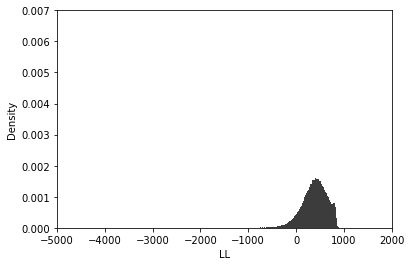

In [7]:
# Give histplot the dataframe and the column name
ax = sns.histplot(data= llc_table, x='LL', color = 'k', stat = 'density', label = 'globe')
#ax = sns.histplot(data=zone1, x='LL', color = 'g', stat = 'density', label = 'zone 1')
#ax = sns.histplot(data=zone2, x='LL', color = 'y', stat = 'density', label = 'zone 2')
#ax = sns.histplot(data=zone3, x='LL', color = 'c', stat = 'density', label = 'zone 3')
#ax = sns.histplot(data=zone4, x='LL', color = 'b', stat = 'density', label = 'zone 4')
#ax = sns.histplot(data=zone5, x='LL', color = 'm', stat = 'density', label = 'zone 5')
#ax.legend()
ax.set_xlim(-5000., 2000.)
ax.set_ylim(0., 0.007)

#### Mean T Histogram

(0.0, 0.2)

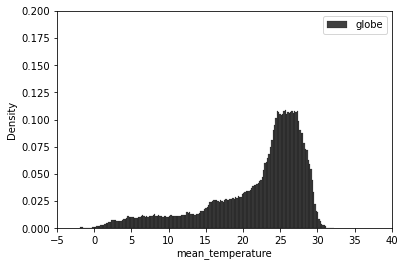

In [67]:
# Give histplot the dataframe and the column name
ax_t = sns.histplot(data= llc_table, x='mean_temperature', color = 'k', stat = 'density', label = 'globe')
#ax_t = sns.histplot(data= zone1, x='mean_temperature', color = 'g', stat = 'density', label = 'zone1')
#ax_t = sns.histplot(data= zone3, x='mean_temperature', color = 'c', stat = 'density', label = 'zone3')
#ax_t = sns.histplot(data= zone4, x='mean_temperature', color = 'b', stat = 'density', label = 'zone4')
#ax_t = sns.histplot(data= zone5, x='mean_temperature', color = 'm', stat = 'density', label = 'zone5')
ax_t.legend()
ax_t.set_xlim(-5., 40.)
ax_t.set_ylim(0., 0.2)

#### DT Histogram

(0.0, 3.0)

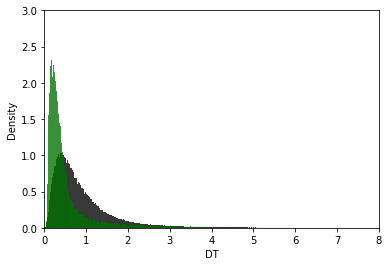

In [65]:
ax_dt = sns.histplot(data= llc_table, x='DT', color = 'k', stat = 'density', label = 'globe')
ax_dt = sns.histplot(data= zone1, x='DT', color = 'g', stat = 'density', label = 'zone1')
#ax_dt = sns.histplot(data= zone2, x='DT', color = 'y', stat = 'probability', label = 'zone2')
#ax_dt = sns.histplot(data= zone3, x='DT', color = 'c', stat = 'probability', label = 'zone3')
#ax_dt = sns.histplot(data= zone4, x='DT', color = 'b', stat = 'probability', label = 'zone4')
#ax_dt = sns.histplot(data= zone5, x='DT', color = 'm', stat = 'probability', label = 'zone5')
ax_dt.set_xlim(0., 8.)
ax_dt.set_ylim(0., 3)

# Zone 1: Equatorial Pacific

In [7]:
in_pacific = (llc_table.lon > -180.) & (llc_table.lon < -80.)
near_equator = (llc_table.lat > -10) & (llc_table.lat < 10)

#zone 1
zone1 = llc_table[in_pacific & near_equator]

In [8]:
#low LL
LL99 = np.percentile(zone1.LL.to_numpy(), 99)
LL1 = np.percentile(zone1.LL.to_numpy(), 1)

lowLL_zone1 = zone1[zone1.LL < LL1]

#high LL
highLL_zone1 = zone1[zone1.LL > LL99]

In [68]:
zone1.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL,DT
202,-7.891554,-109.553930,773,2012-01-01 08:50:00,403.138611,1862,0.048767,23.619480,23.490002,23.875999,...,0,128328,-7.898280,-109.552086,7477,13813,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,804.823853,0.167000
203,-7.872714,-109.619430,766,2012-01-01 08:50:00,397.708374,1861,0.049927,23.627960,23.496000,23.889999,...,0,623684,-7.879214,-109.614586,7478,13810,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,839.105530,0.184999
204,-7.810381,-109.409065,786,2012-01-01 08:50:00,318.722900,1851,0.049866,23.633785,23.477001,23.889999,...,0,119068,-7.802940,-109.406250,7482,13820,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,811.312988,0.252998
205,-7.471281,-133.539080,837,2012-01-01 10:30:00,263.785706,1352,0.048828,25.152061,24.768002,25.511002,...,0,66035,-7.478584,-133.531250,7499,12662,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,441.100220,0.470999
206,-7.459239,-133.869050,805,2012-01-01 10:30:00,258.507568,1356,0.048828,25.136745,24.768002,25.538002,...,0,297801,-7.459495,-133.864578,7500,12646,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,447.893433,0.458000


In [71]:
zone1.iloc[0].filename

's3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_00.nc'

#### Location

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


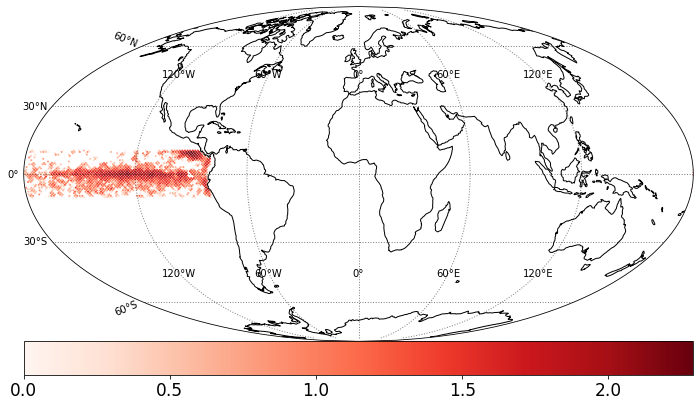

In [10]:
_ = ulmo_figs.show_spatial(zone1)

#### LL Histogram

(0.0, 0.1)

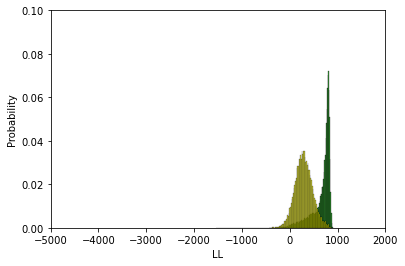

In [62]:
# Give histplot the dataframe and the column name
ax1 = sns.histplot(data=zone1, x='LL', color = 'g', stat = 'probability', label = 'zone 1')
ax1 = sns.histplot(data=zone1, x='modis_LL', color = 'y', stat = 'probability', label = 'zone 1')

ax1.set_xlim(-5000., 2000.)
ax1.set_ylim(0., 0.1)

#### Mean T Histogram

(0.0, 0.05)

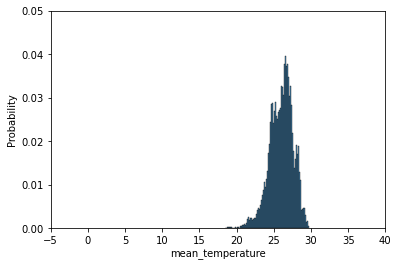

In [12]:
ax1_t = sns.histplot(data= zone1, x='mean_temperature', stat = 'probability')
ax1_t.set_xlim(-5., 40.)
ax1_t.set_ylim(0., 0.05)

#### DT Histogram

(0.0, 0.06)

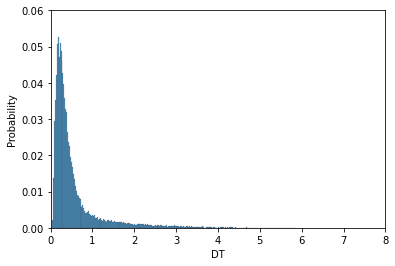

In [13]:
ax1_dt = sns.histplot(data= zone1, x='DT', stat = 'probability')
ax1_dt.set_xlim(0., 8.)
ax1_dt.set_ylim(0., 0.06)

#### Pick 9 random cutouts of low LL and high LL

In [14]:
lowLL_zone1.shape

(320, 27)

In [15]:
highLL_zone1.shape

(320, 27)

In [16]:
indices1 = random.sample( range(lowLL_zone1.shape[0]), 9)

lowLL_1 = lowLL_zone1.iloc[indices1]
highLL_1 = highLL_zone1.iloc[indices1]

#### Plot bottom 1% cutouts

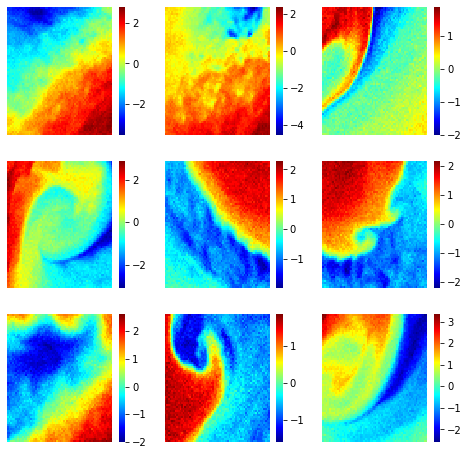

In [17]:
# plot these 9 cutouts side by side (3x3)
# for low LL

fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( lowLL_1.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()

#### Plot top 1% cutouts

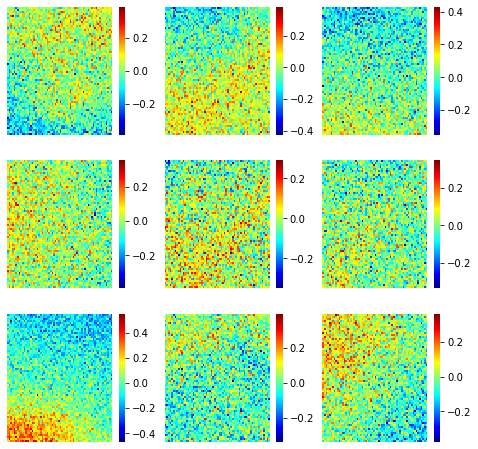

In [18]:
fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( highLL_1.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()

# Zone 2: Indian Ocean

In [19]:
in_indian = (llc_table.lon > 50.) & (llc_table.lon < 90.)
near_equator1 = (llc_table.lat > -15) & (llc_table.lat < 10)

#zone 2
zone2 = llc_table[in_indian & near_equator1]

In [20]:
#low LL
LL99 = np.percentile(zone2.LL.to_numpy(), 99)
LL1 = np.percentile(zone2.LL.to_numpy(), 1)

lowLL_zone2 = zone2[zone2.LL < LL1]

#high LL
highLL_zone2 = zone2[zone2.LL > LL99]

In [21]:
zone2.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL,DT
814,1.758326,75.111374,325,2012-01-01 20:20:00,469.843872,1738,0.049194,28.568413,28.358002,28.726002,...,0,345483,1.750807,75.114586,7978,5397,2012-01-02,s3://llc/ThetaUVSalt/LLC4320_2012-01-02T00_00_...,806.241211,0.238001
815,1.892684,74.758950,292,2012-01-01 20:20:00,437.006531,1729,0.049927,28.508785,28.301001,28.726002,...,0,338236,1.886071,74.760414,7985,5380,2012-01-02,s3://llc/ThetaUVSalt/LLC4320_2012-01-02T00_00_...,756.624207,0.273001
816,1.987317,75.162060,325,2012-01-01 20:20:00,568.424988,1712,0.018494,28.549904,28.365002,28.726002,...,0,233338,1.982672,75.156250,7990,5399,2012-01-02,s3://llc/ThetaUVSalt/LLC4320_2012-01-02T00_00_...,791.800659,0.228001
817,2.039060,74.804000,293,2012-01-01 20:20:00,506.453125,1712,0.026794,28.493784,28.309000,28.726002,...,0,268798,2.040626,74.802086,7993,5382,2012-01-02,s3://llc/ThetaUVSalt/LLC4320_2012-01-02T00_00_...,781.191956,0.264000
818,2.114277,74.428900,261,2012-01-01 20:20:00,436.807739,1710,0.047852,28.425047,28.209002,28.719002,...,0,179805,2.117891,74.427086,7997,5364,2012-01-02,s3://llc/ThetaUVSalt/LLC4320_2012-01-02T00_00_...,766.833679,0.245001


#### Location

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


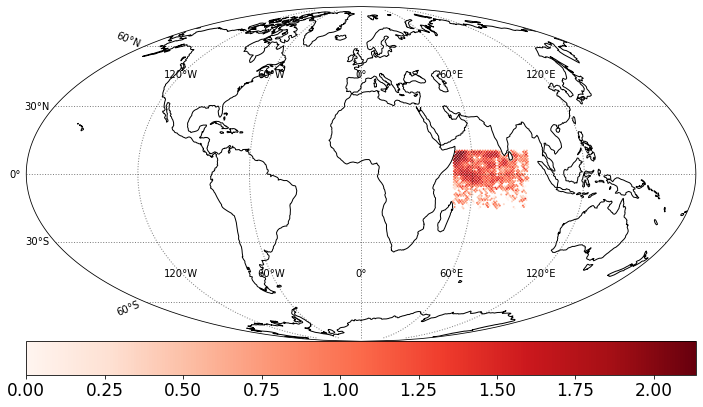

In [22]:
_ = ulmo_figs.show_spatial(zone2)

#### LL Histogram

(0.0, 0.1)

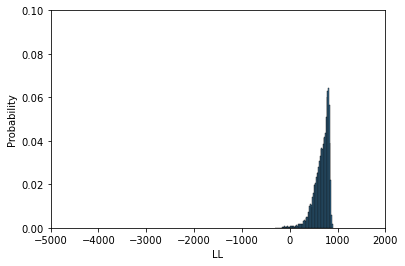

In [23]:
# Give histplot the dataframe and the column name
ax2 = sns.histplot(data=zone2, x='LL', stat = 'probability')
ax2.set_xlim(-5000., 2000.)
ax2.set_ylim(0., 0.1)

#### Mean T Histogram

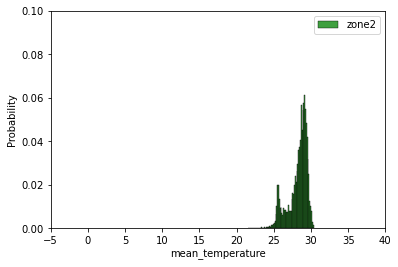

In [25]:
ax2_t = sns.histplot(data=zone2, x='mean_temperature', stat = 'probability', color = 'g', label = 'zone2')
ax2_t.set_xlim(-5., 40.)
ax2_t.set_ylim(0., 0.1)
ax2_t.legend()

#### DT Histogram

(0.0, 0.1)

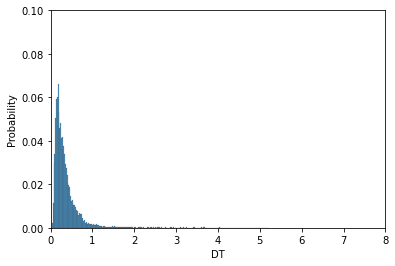

In [26]:
ax2_dt = sns.histplot(data=zone2, x='DT', stat = 'probability')
ax2_dt.set_xlim(0., 8.)
ax2_dt.set_ylim(0., 0.1)

#### Pick 9 random numbers for indices

In [27]:
lowLL_zone2.shape

(166, 27)

In [28]:
highLL_zone2.shape

(166, 27)

In [29]:
indices2 = random.sample( range(lowLL_zone2.shape[0]), 9)

lowLL_2 = lowLL_zone2.iloc[indices2]
highLL_2 = highLL_zone2.iloc[indices2]

#### Plot bottom 1% cutouts

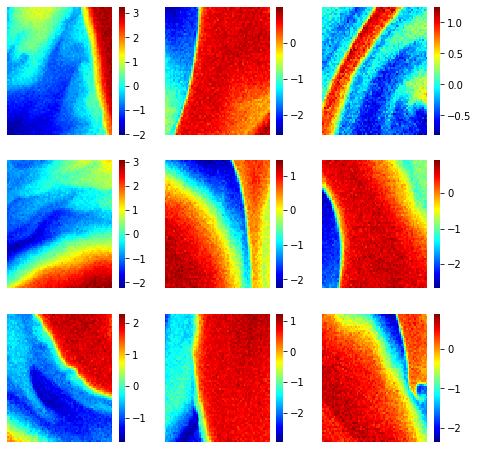

In [30]:
# plot these 9 cutouts side by side (3x3)
# for low LL

fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( lowLL_2.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()

#### Plot top 1% cutouts

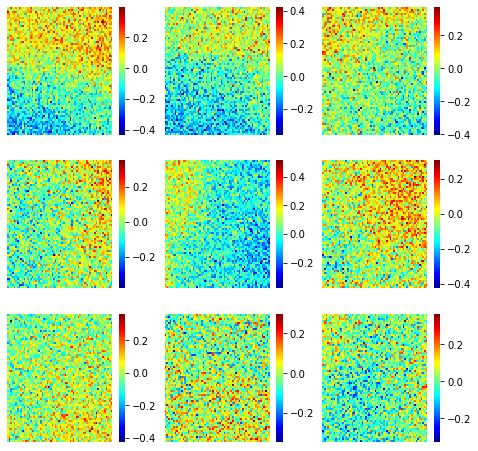

In [31]:
# plot these 9 cutouts side by side (3x3)
# for high LL

fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( highLL_2.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()

# Zone 3: South American East Coast

In [32]:
in_atlantic = (llc_table.lon > -70.) & (llc_table.lon < -40.)
below_equator = (llc_table.lat > -50) & (llc_table.lat < -30)

#zone 3
zone3 = llc_table[in_atlantic & below_equator]

In [33]:
#low LL
LL99 = np.percentile(zone3.LL.to_numpy(), 99)
LL1 = np.percentile(zone3.LL.to_numpy(), 1)

lowLL_zone3 = zone3[zone3.LL < LL1]

#high LL
highLL_zone3 = zone3[zone3.LL > LL99]

In [34]:
zone3.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL,DT
5,-43.289627,-52.337948,197,2012-01-01 04:05:00,65.601135,1264,0.037964,19.539640,16.013,21.828001,...,0,256662,-43.294323,-52.343750,5384,16559,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,-342.616089,5.036001
6,-43.301037,-51.702736,229,2012-01-01 04:05:00,-26.248413,1252,0.049805,19.630821,15.885,21.828001,...,0,57049,-43.294323,-51.697918,5384,16590,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,-697.843994,5.167000
7,-43.235897,-51.077957,261,2012-01-01 04:05:00,-33.526733,1232,0.043335,18.088089,15.961,21.560001,...,0,132243,-43.237888,-51.072918,5388,16620,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,-362.451660,4.766003
8,-43.128727,-51.626130,229,2012-01-01 04:05:00,-2.603516,1232,0.014709,19.670353,15.961,21.819000,...,0,227893,-43.124866,-51.635418,5396,16593,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,-470.987854,4.917999
9,-43.053740,-50.444057,293,2012-01-01 04:05:00,46.522583,1200,0.044067,17.223206,16.090,18.121000,...,0,396911,-43.054134,-50.447918,5401,16650,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,172.158142,1.115000


#### Location

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


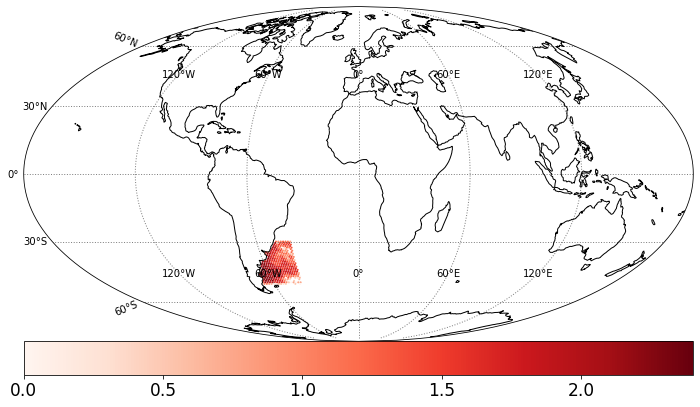

In [35]:
_ = ulmo_figs.show_spatial(zone3)

#### LL Histogram

(0.0, 0.05)

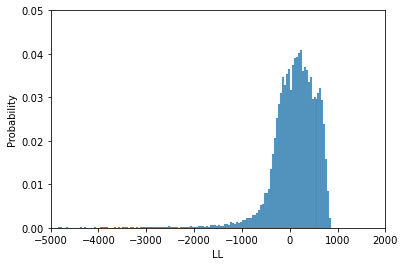

In [36]:
# Give histplot the dataframe and the column name
ax3 = sns.histplot(data=zone3, x='LL', stat='probability')
ax3.set_xlim(-5000., 2000.)
ax3.set_ylim(0., 0.05)

#### Mean T Histogram

(0.0, 0.05)

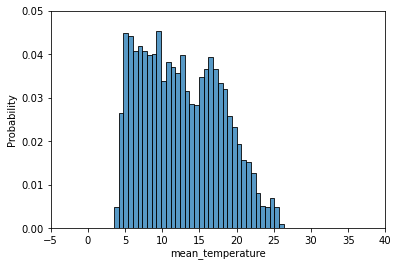

In [37]:
ax3_t = sns.histplot(data=zone3, x='mean_temperature', stat='probability')
ax3_t.set_xlim(-5., 40.)
ax3_t.set_ylim(0., 0.05)

#### DT Histogram

(0.0, 0.1)

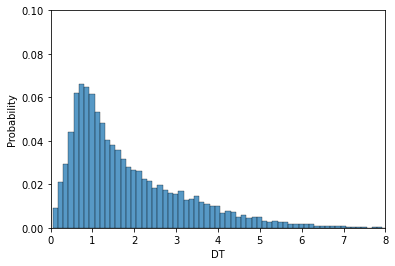

In [38]:
ax3_dt = sns.histplot(data=zone3, x='DT', stat='probability')
ax3_dt.set_xlim(0., 8.)
ax3_dt.set_ylim(0., 0.1)

#### Pick 9 random numbers

In [39]:
indices3 = random.sample( range(lowLL_zone3.shape[0]), 9)

lowLL_3 = lowLL_zone3.iloc[indices3]
highLL_3 = highLL_zone3.iloc[indices3]

#### Plot bottom 1% 

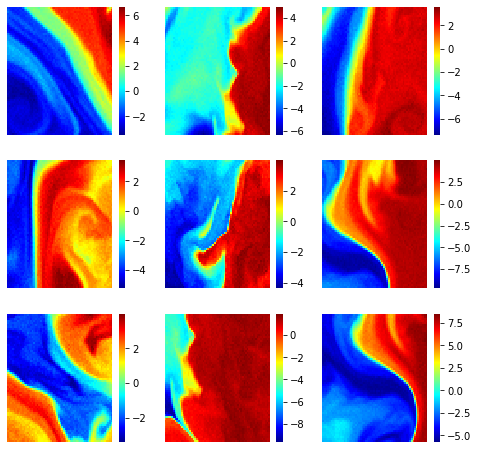

In [40]:
# plot these 9 cutouts side by side (3x3)
# for low LL

fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( lowLL_3.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()

#### Plot top 1%

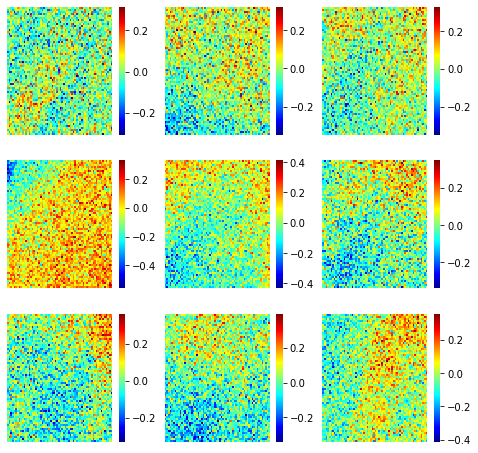

In [41]:
# plot these 9 cutouts side by side (3x3)
# for high LL

fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( highLL_3.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()

# Zone 4: Off Cape Town

In [42]:
current = (llc_table.lon > 0.) & (llc_table.lon < 50.)
below_africa = (llc_table.lat > -50) & (llc_table.lat < -30)

#zone 4
zone4 = llc_table[current & below_africa]

In [43]:
#low LL
LL99 = np.percentile(zone4.LL.to_numpy(), 99)
LL1 = np.percentile(zone4.LL.to_numpy(), 1)

lowLL_zone4 = zone4[zone4.LL < LL1]

#high LL
highLL_zone4 = zone4[zone4.LL > LL99]

In [44]:
zone4.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL,DT
108,-31.934961,3.899274,357,2012-01-01 00:45:00,50.167908,816,0.032227,19.203171,18.174999,19.795,...,0,220694,-31.937027,3.906250,6131,1979,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,149.460693,0.611000
111,-31.903538,2.568425,261,2012-01-01 00:45:00,89.647888,838,0.047791,19.401241,18.153999,20.180,...,0,154424,-31.904465,2.572917,6133,1915,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,106.286316,0.719999
112,-31.893417,2.069860,229,2012-01-01 00:45:00,104.596741,847,0.045776,19.464567,18.153999,20.180,...,0,84146,-31.888180,2.072917,6134,1891,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,110.237915,0.787998
113,-31.864360,3.496339,325,2012-01-01 00:45:00,31.494202,816,0.025146,19.316803,18.137001,19.795,...,0,289524,-31.871891,3.489583,6135,1959,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,127.353149,0.583000
115,-31.807840,1.560660,197,2012-01-01 00:45:00,127.619751,848,0.044556,19.587460,18.880001,20.215,...,0,399301,-31.806713,1.552083,6139,1866,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,151.647522,0.632000


#### Location

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


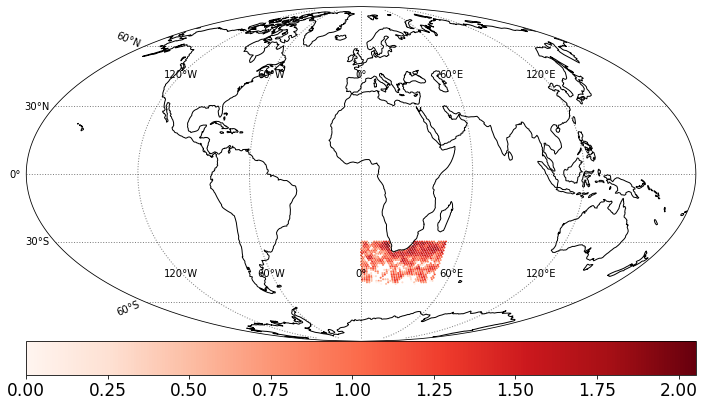

In [45]:
_ = ulmo_figs.show_spatial(zone4)

#### LL Histogram

(0.0, 0.05)

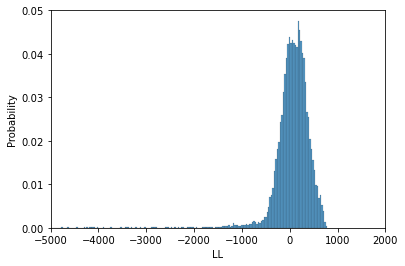

In [46]:
# Give histplot the dataframe and the column name
ax4 = sns.histplot(data=zone4, x='LL', stat='probability')
ax4.set_xlim(-5000., 2000.)
ax4.set_ylim(0., 0.05)

#### Mean T Histogram

(0.0, 0.1)

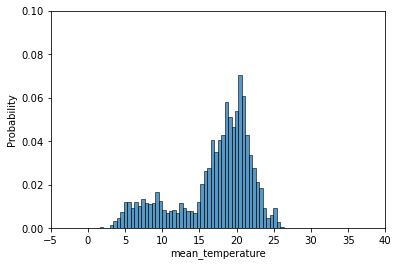

In [47]:
ax4_t = sns.histplot(data=zone4, x='mean_temperature', stat='probability')
ax4_t.set_xlim(-5., 40.)
ax4_t.set_ylim(0., 0.1)

#### DT Histogram

(0.0, 0.1)

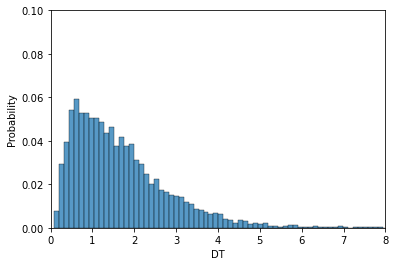

In [48]:
ax4_dt = sns.histplot(data=zone4, x='DT', stat='probability')
ax4_dt.set_xlim(0., 8.)
ax4_dt.set_ylim(0., 0.1)

#### Plot 9 random numbers

In [49]:
indices4 = random.sample( range(lowLL_zone4.shape[0]), 9)

lowLL_4 = lowLL_zone4.iloc[indices4]
highLL_4 = highLL_zone4.iloc[indices4]

#### Plot bottom 1%

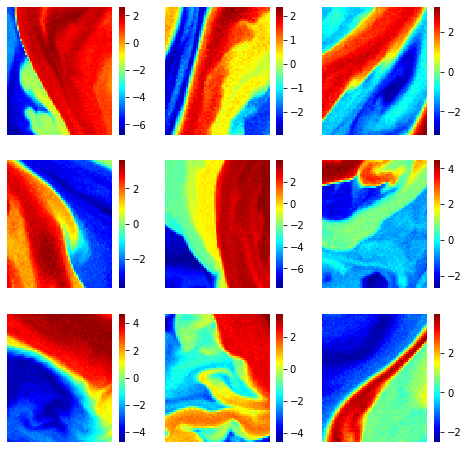

In [50]:
# plot these 9 cutouts side by side (3x3)
# for low LL

fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( lowLL_4.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()

#### Plot top 1%

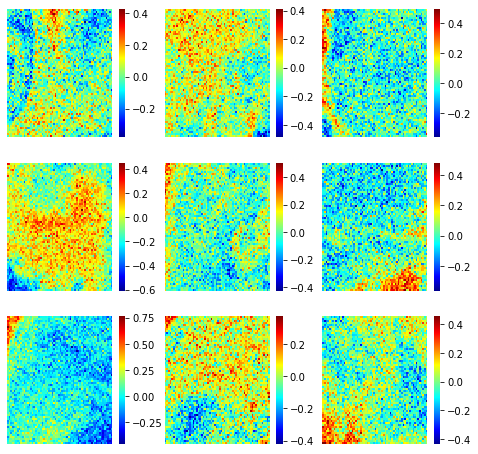

In [51]:
# plot these 9 cutouts side by side (3x3)
# for low LL

fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( highLL_4.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()

# Zone 5: Mediterranean

In [52]:
port_isra = (llc_table.lon > -5.) & (llc_table.lon < 35.)
euro_afri = (llc_table.lat > 30) & (llc_table.lat < 45)

#zone 5
zone5 = llc_table[port_isra & euro_afri]

In [53]:
#low LL
LL99 = np.percentile(zone5.LL.to_numpy(), 99)
LL1 = np.percentile(zone5.LL.to_numpy(), 1)

lowLL_zone5 = zone5[zone5.LL < LL1]

#high LL
highLL_zone5 = zone5[zone5.LL > LL99]

#### Location

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


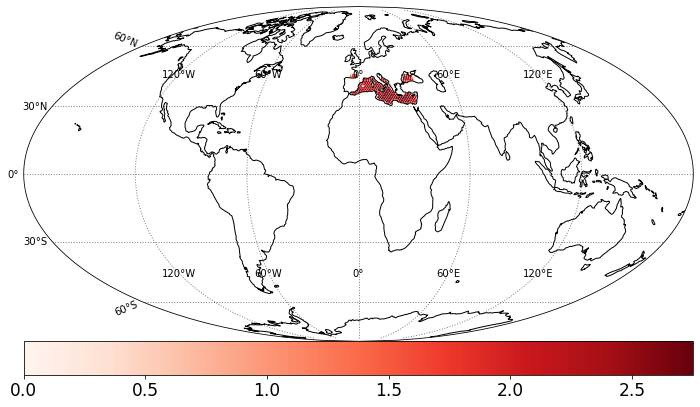

In [54]:
_ = ulmo_figs.show_spatial(zone5)

#### LL Histogram

(0.0, 0.05)

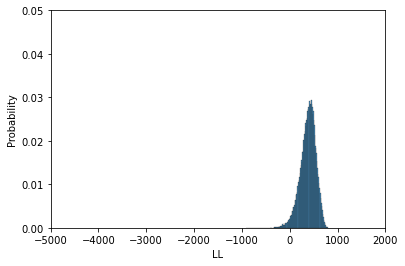

In [55]:
# Give histplot the dataframe and the column name
ax5 = sns.histplot(data=zone5, x='LL', stat='probability')
ax5.set_xlim(-5000., 2000.)
ax5.set_ylim(0., 0.05)

#### Mean T Histogram

(0.0, 0.1)

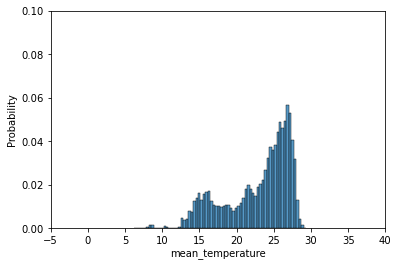

In [56]:
ax5_t = sns.histplot(data=zone5, x='mean_temperature', stat='probability')
ax5_t.set_xlim(-5., 40.)
ax5_t.set_ylim(0., 0.1)

#### DT Histogram

(0.0, 0.05)

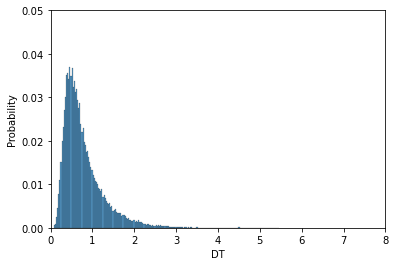

In [57]:
ax5_dt = sns.histplot(data=zone5, x='DT', stat='probability')
ax5_dt.set_xlim(0., 8.)
ax5_dt.set_ylim(0., 0.05)

#### Pick 9 random numbers

In [58]:
indices5 = random.sample( range(lowLL_zone5.shape[0]), 9)

lowLL_5 = lowLL_zone5.iloc[indices5]
highLL_5 = highLL_zone5.iloc[indices5]

#### Plot bottom 1%

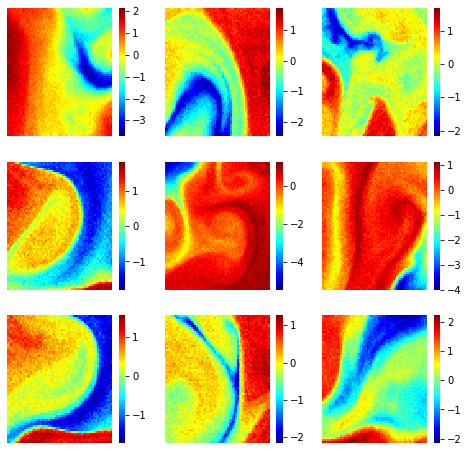

In [59]:
# plot these 9 cutouts side by side (3x3)
# for low LL

fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( lowLL_5.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()

#### Plot top 1%

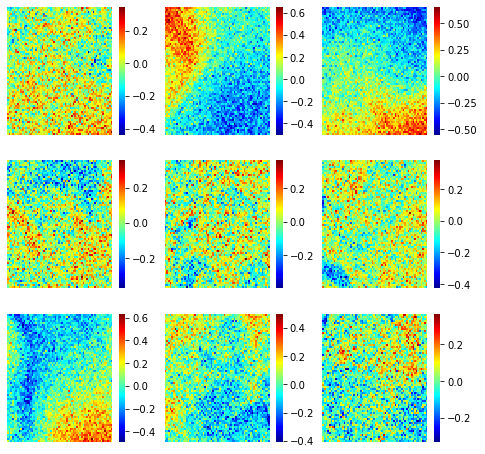

In [60]:
# plot these 9 cutouts side by side (3x3)
# for high LL

fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( highLL_5.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()